In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

cpu = pd.read_csv("machine.data_update.csv")
cpu

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,Aug-80,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


I. 문제 정의

데이터 셋 “machine_data.csv ” 기반으로 CPU 성능에 관련된 다양한 특징들을 이용하여 CPU의 성능을 예측하는 회귀 분석 모델링하시오. 

II. 데이터 셋 소개 및 지도학습의 타겟 변수 정의 

다음 주어진 데이터 셋 “machine_data.csv”은 “UC Irvine Machine Learning Repository”에서 제공하는 CPU 성능과 관련된 다양한 특징(features, variables)을 포함하고 있다. 이 데이터 셋는 9개의 특징을 가지는 209개의 샘플로 구성되어 있다. 9개의 특징은 다음과 같은 변수 표 정보를 요약할 수 있다. 이 데이터 셋은 CPU의 다양한 기술적 특징과 성능을 포함하여 데이터분석 및 비교를 용이하게 해준다. 
- 데이터 셋 출처 URL : https://archive.ics.uci.edu/dataset/29/computer+hardware
- 타겟 변수 : PRP는 “실제 발표된 CPU 성능”을 나타내어, 성능 예측 모델의 정확성을 평가하는 데 지도학습의 목표값으로 사용한다.

III. 3차 프로그래밍과제 구현 내용

(1) II. 데이터 셋에서 주어진 특징들을 선택하여 CPU 성능 즉, “PRP” 변수를 예측하는 LinearRegression 기반 다중 선형 회귀 모델링을 프로그래밍 하시오.
- 데이터 탐색 및 시각화, 전처리, 훈련 데이터와 테스트 데이터 분리, 훈련 데이터 학습과정, 교차 검증, 분석 결과 시각화 등을 포함하여 최적화하는 전체 과정을 포함하시오.

(2) (1) 단계에서 얻은 다중 선형 회귀 모델을 사용하여 학습 데이터와 테스트 데이터 각각에 대해 이 모델의 성능을 평가하시오. 
- Mean squared Error, Mean absolute Error, R^2, 교차검증

(3) (2) 단계에서 얻은 모델의 테스트 데이터에 대해 R^2가 90% 이상이 나오도록 모델을 개선하시오.

(4) (1), (2), (3) 단계 과정을 포함한 전체 프로그래밍을 소스파일 “linear_cpu_data.ipynb”로 작성해서 사이버캠퍼스 “3차 프로그래밍과제”와 github에 각각 업로드 하시오.

(1) II. 데이터 셋에서 주어진 특징들을 선택하여 CPU 성능 즉, “PRP” 변수를 예측하는 LinearRegression 기반 다중 선형 회귀 모델링을 프로그래밍 하시오.
- 데이터 탐색 및 시각화, 전처리, 훈련 데이터와 테스트 데이터 분리, 훈련 데이터 학습과정, 교차 검증, 분석 결과 시각화 등을 포함하여 최적화하는 전체 과정을 포함하시오.

Text(0.5, 1.0, 'PRP')

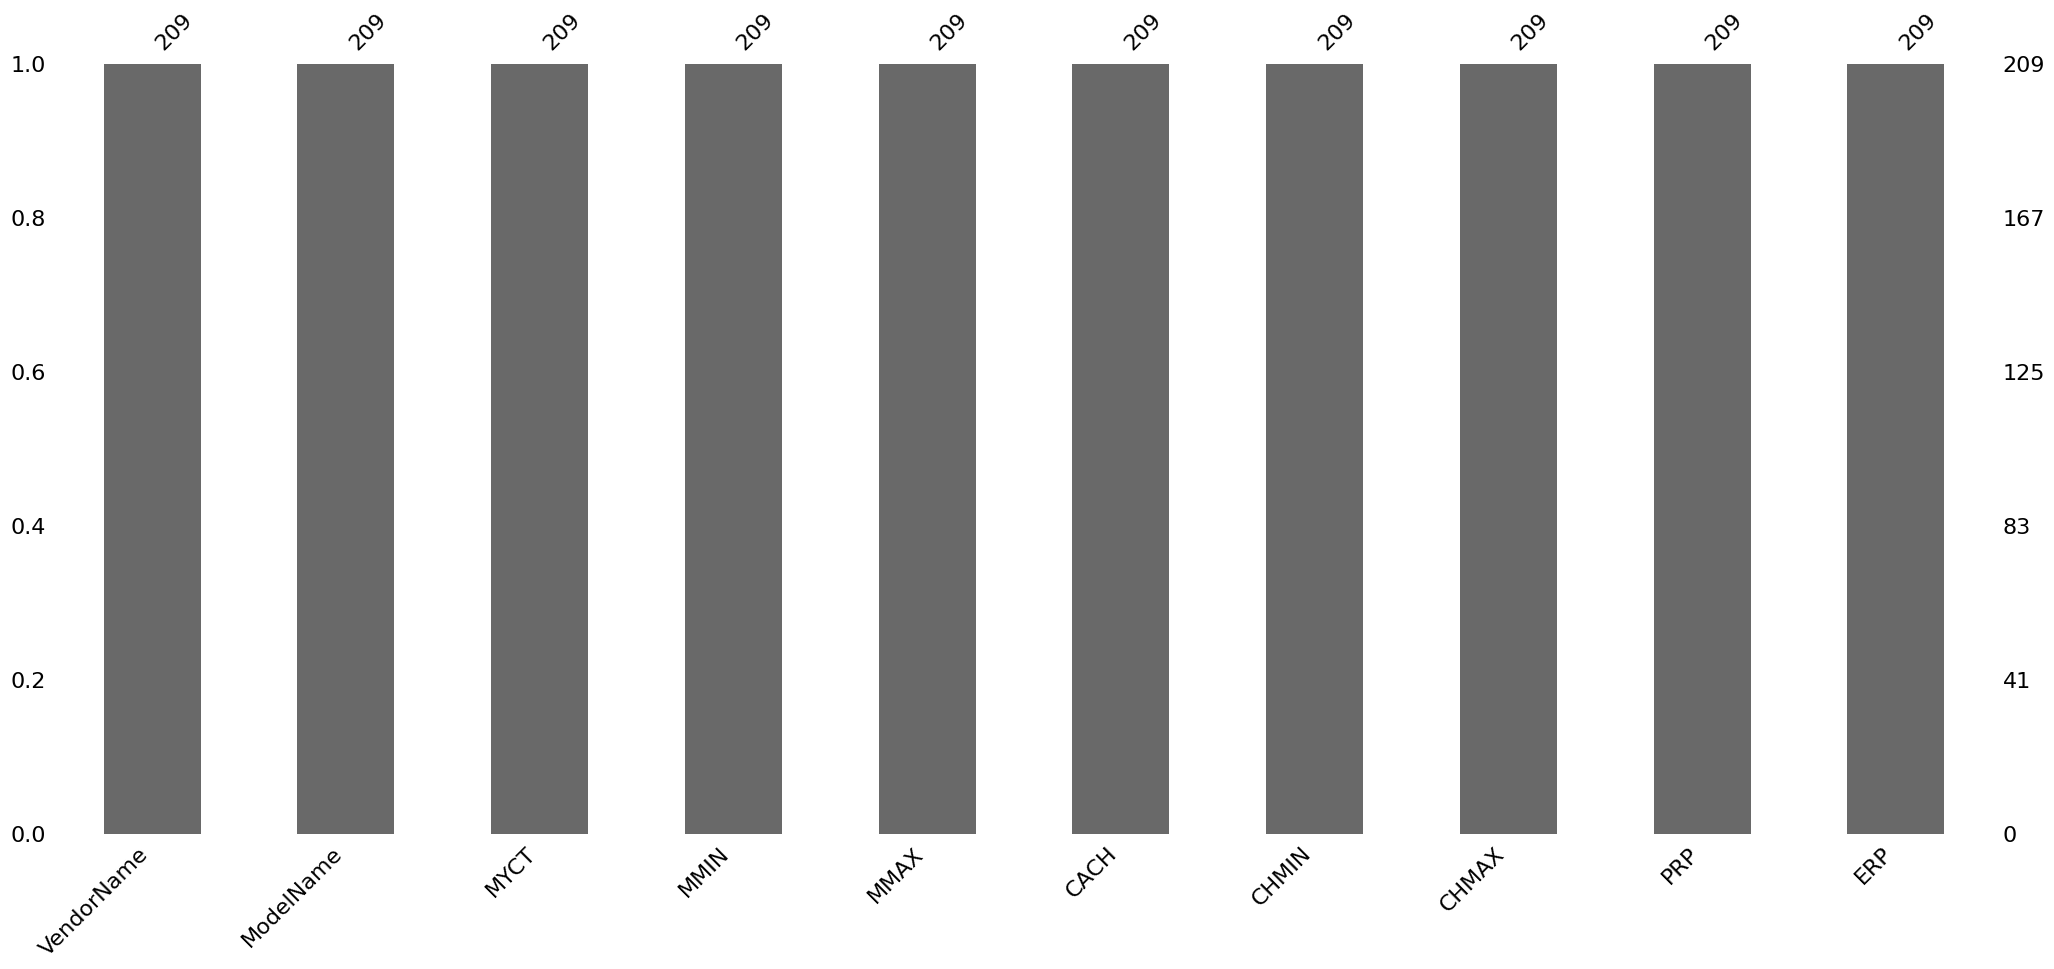

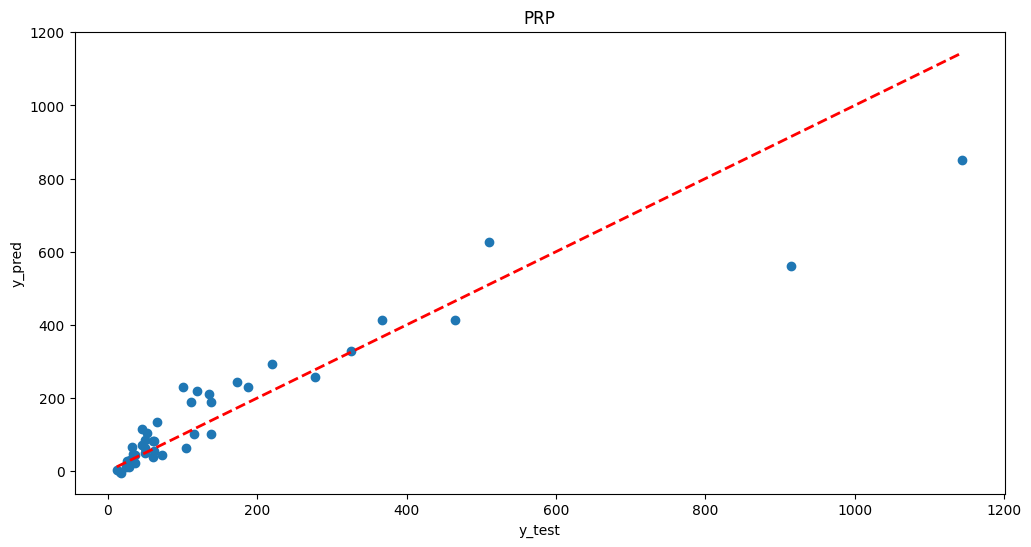

In [2]:
cpu = pd.read_csv("machine.data_update.csv")

msn.bar(cpu)

# 상관도를 계산하기 특징들을 모두 수치화 변환
# 범주형 데이터 수치화
dum = pd.get_dummies(cpu['VendorName'], prefix='c', dtype=float)
cpu = pd.concat([cpu.drop('VendorName', axis=1), dum], axis =1)
cpu.head()

dum = pd.get_dummies(cpu['ModelName'], prefix='c', dtype=float)
cpu = pd.concat([cpu.drop('ModelName', axis=1), dum], axis =1)
cpu.head()

# (1) PRP에 관련된 다른 특성들과의 상관계수 값만을 출력
result = cpu.corr()['PRP']
# 상관계수 값을 양의 상관계수로 처리
result = np.abs(result)
# 상관계수를 내림차순으로 정렬하기
result.sort_values(ascending = False)

# 맴버 features 선택
num_features = ['MMAX', 'MMIN', 'CACH']

X = cpu[num_features] # 2차원 배열
y = cpu['PRP'] # 1차원 시리즈

#데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 21)

# 3. 모델 선택
model = LinearRegression()

# 4. 모델 학습 : training data, supervised learning
model.fit(X_train,y_train)

# 5. 학습 모델을 이용하여 예측 : testing data
# y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 6. 시각화
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("PRP")

(2) (1) 단계에서 얻은 다중 선형 회귀 모델을 사용하여 학습 데이터와 테스트 데이터 각각에 대해 이 모델의 성능을 평가하시오. 
- Mean squared Error, Mean absolute Error, R^2, 교차검증

In [3]:
# 학습 모델 성능 평가 : y_train_pred , y_test_pred
# print("훈련 데이터의 성능:")
# print(f"R^2 : {r2_score(y_train, y_train_pred)}, MSE : {mean_squared_error(y_train, y_train_pred)}")

print("\n테스트 데이터의 성능:")
print(f"R^2 : {r2_score(y_test, y_test_pred)}, MSE : {mean_squared_error(y_test, y_test_pred)}, MAE : {mean_absolute_error(y_test, y_test_pred)} ")


테스트 데이터의 성능:
R^2 : 0.8609270185571328, MSE : 7281.961986464907, MAE : 50.365780238861326 


(3) (2) 단계에서 얻은 모델의 테스트 데이터에 대해 R^2가 90% 이상이 나오도록 모델을 개선하시오.

Text(0.5, 1.0, 'PRP')

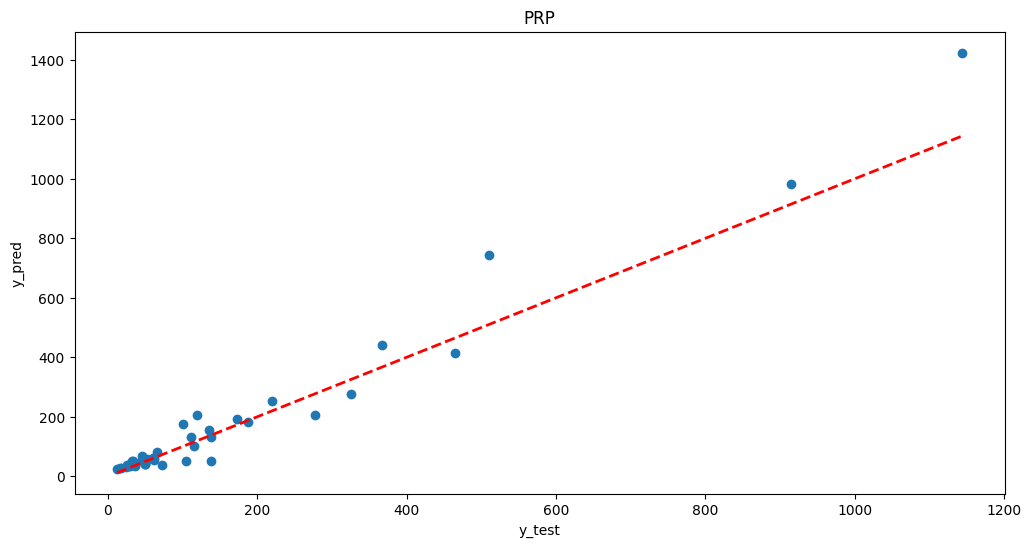

In [4]:
cpu = pd.read_csv("machine.data_update.csv")

# msn.bar(cpu)

# 상관도를 계산하기 특징들을 모두 수치화 변환
# 범주형 데이터 수치화
dum = pd.get_dummies(cpu['VendorName'], prefix='c', dtype=float)
cpu = pd.concat([cpu.drop('VendorName', axis=1), dum], axis =1)
cpu.head()

dum = pd.get_dummies(cpu['ModelName'], prefix='c', dtype=float)
cpu = pd.concat([cpu.drop('ModelName', axis=1), dum], axis =1)
cpu.head()

# (1) PRP에 관련된 다른 특성들과의 상관계수 값만을 출력
result = cpu.corr()['PRP']
# 상관계수 값을 양의 상관계수로 처리
result = np.abs(result)
# 상관계수를 내림차순으로 정렬하기
result.sort_values(ascending = False).head(6)



# 맴버 features 선택
num_features = ['MMAX', 'MMIN', 'CACH', 'CHMIN','CHMAX','ERP']

X = cpu[num_features] # 2차원 배열
y = cpu['PRP'] # 1차원 시리즈

#데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 21)

# 3. 모델 선택
model = LinearRegression()

# 4. 모델 학습 : training data, supervised learning
model.fit(X_train,y_train)

# 5. 학습 모델을 이용하여 예측 : testing data
# y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
# 6. 시각화
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("PRP")

In [5]:
# 학습 모델 성능 평가 : y_train_pred , y_test_pred
# print("훈련 데이터의 성능:")
# print(f"R^2 : {r2_score(y_train, y_train_pred)}, MSE : {mean_squared_error(y_train, y_train_pred)}")

mse1 = mean_squared_error(y_test, y_test_pred)
mae1 = mean_absolute_error(y_test, y_test_pred)
r21 = r2_score(y_test, y_test_pred)

mse2 = mean_squared_error(y_train, y_train_pred)
mae2 = mean_absolute_error(y_train, y_train_pred)
r22 = r2_score(y_train, y_train_pred)

print("\n테스트 데이터의 성능:")
print(f"R^2 : {r21}, MSE : {mse1}, MAE : {mae1} ")


테스트 데이터의 성능:
R^2 : 0.9167940940489351, MSE : 4356.721470258701, MAE : 35.490803482044385 


In [6]:
performance_data = {
    "Model": ["LinearRegression","LinearRegression"],
    "Data": ["Test","Train"],
    "MSE": [mse1,mse2],
    "MAE": [mae1,mae2],
    "R^2": [r21,r22],
}

df = pd.DataFrame(performance_data)
df.to_csv('data.csv', index=False)